In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import defaultdict
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (5,5)
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams["image.origin"] = 'lower'

In [2]:
samples_dir = "/eos/home-d/dmapelli/public/latino/Full2017v6_200120_v1"
cut = "lowen_looseVBS"

In [3]:
samples = {}
for file in os.listdir(os.path.join(samples_dir, cut)):
    s = pickle.load(open(os.path.join(samples_dir, cut, file), "rb"))
    sname = file.split("_part")[0]
    s.rename(columns=lambda c: c.split(cut+"_")[1] if cut in c else c, inplace=True)
    if sname in samples:
        samples[sname] = pd.concat([samples[sname], s], ignore_index=True)
    else:
        samples[sname] = s


Welcome to JupyROOT 6.18/00


In [5]:
for s, df in samples.items():
    print(f"Sample name {s:10}, nsamples: {len(df):10},   XS total: {(df.XSWeight*df.weight).sum():15}")

Sample name DY        , nsamples:     107499,   XS total: 269.02867965738903
Sample name VBS       , nsamples:     123434,   XS total: 13.22248934438796
Sample name Wjets     , nsamples:     605804,   XS total: 4073.941544052166
Sample name top       , nsamples:      52217,   XS total: 345.00694427212994


In [15]:
df = samples["Wjets"]
df.columns

Index(['weight', 'XSWeight', 'TriggerEffWeight_1l', 'btagSF', 'puWeight',
       'EMTFbug_veto', 'PrefireWeight', 'Lepton_RecoSF_0', 'LepWPCut',
       'LepWPWeight', 'events', 'Lepton_pt', 'Lepton_eta', 'Lepton_phi',
       'Lepton_flavour', 'PuppiMET', 'PuppiMET_phi', 'MET_pt', 'recoMET_pz',
       'nJets', 'N_jets_central', 'N_jets_forward', 'mjj_vbs', 'deltaeta_vbs',
       'deltaphi_vbs', 'vbs_etaprod', 'vbs_0_pt', 'vbs_1_pt', 'vbs_0_eta',
       'vbs_1_eta', 'vbs_0_phi', 'vbs_1_phi', 'vbs_index_0', 'vbs_index_1',
       'mjj_vjet', 'vjet_0_pt', 'vjet_1_pt', 'vjet_0_eta', 'vjet_1_eta',
       'vjet_0_phi', 'vjet_1_phi', 'vjet_index_0', 'vjet_index_1', 'Zvjets_0',
       'Zlep', 'Asym_vbs', 'Asym_vjet', 'Mw_lep_reco', 'Mtw_lep', 'w_lep_pt',
       'Mww', 'R_ww', 'R_mw', 'A_ww', 'Centr_vbs', 'Centr_ww', 'nvtx', 'qgl'],
      dtype='object')

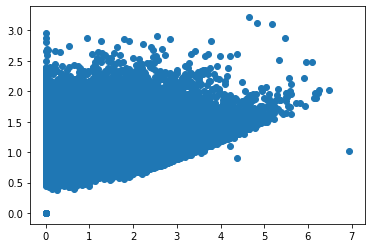

In [23]:
plt.scatter(df.weight, df.btagSF)

In [ ]:
plt.scatter(df.weight, df.Lepton_RecoSF)

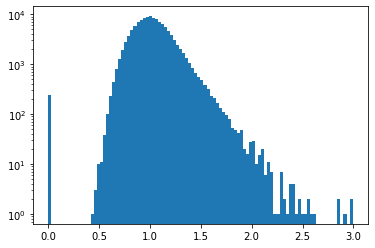

In [12]:
_ = plt.hist(df.btagSF, bins=100)
plt.yscale("log")



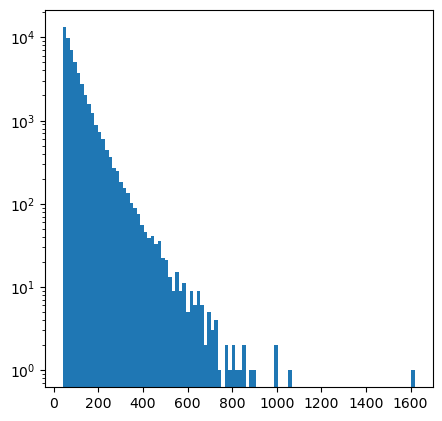

In [45]:
df = samples["VBS"]
_ = plt.hist(df[(df.Lepton_flavour==11) & (df.Lepton_pt > 40)].Lepton_pt, bins=100 )
plt.yscale("log")